# Clasificación por KNN

#### Autor: Erick Salas Chaverri

#### Objetivo: 
Mostrar la ejercución de un algoritmo KNN para clasificar las frutas según sus características

Se tiene un dataset con información de las alturas y masas de una colección de frutas.

Se van a realizar los siguiente pasos:

- Extracción de datos
- Caracterización
- Transformación
- Minería de datos: Aplicación KNN para clasificar
- Predición


## **Pasos**

### **Importación de bibliotecas**

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D


### Extracción de datos
#### Métricas de dimensiones de diversas frutas

In [ ]:
# read_table, leer archivos de texto al estilo de txt
df_frutas = pd.read_table('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/fruit_data_with_colors.txt')

# head() # previsualizar el dataframe
df_frutas.head()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

### **Caracterización**

Se tiene un dataframe con la masa, anchura, altura y una cuantificación del color

Se tiene un dataframe de 59 filas y 7 columnas

In [ ]:
# cuantas filas y cuantas columnas
df_frutas.shape

(59, 7)

##### La descripción de las columnas con valores numéricos

In [ ]:
# decribe permite mostrarnos estadísticos básico
df_frutas.describe()

fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000

In [ ]:
# para obtener la lista de nombres de las columnas
columnas_lista = df_frutas.columns.tolist()
columnas_lista

['fruit_label',
 'fruit_name',
 'fruit_subtype',
 'mass',
 'width',
 'height',
 'color_score']

### Transformación

In [ ]:
# renombrar los nombres de las columnas
df_frutas.rename(columns={
 'fruit_label': 'etiqueta_fruta',
 'fruit_name': 'nombre_fruta',
 'fruit_subtype': 'subtipo_fruta',
 'mass': 'masa_fruta',
 'width' : 'ancho_fruta',
 'height': 'altura_fruta',
 'color_score': 'puntaje_color'
}, inplace=True)

In [ ]:
df_frutas.head()

etiqueta_fruta nombre_fruta subtipo_fruta  masa_fruta  ancho_fruta  \
0               1        apple  granny_smith         192          8.4   
1               1        apple  granny_smith         180          8.0   
2               1        apple  granny_smith         176          7.4   
3               2     mandarin      mandarin          86          6.2   
4               2     mandarin      mandarin          84          6.0   

   altura_fruta  puntaje_color  
0           7.3           0.55  
1           6.8           0.59  
2           7.2           0.60  
3           4.7           0.80  
4           4.6           0.79

In [ ]:
# para averiguar los tipos de datos
# int numero entero
# object  texto
# float decimal
df_frutas.dtypes

etiqueta_fruta      int64
nombre_fruta       object
subtipo_fruta      object
masa_fruta          int64
ancho_fruta       float64
altura_fruta      float64
puntaje_color     float64
dtype: object

In [ ]:
#   tabla.columna    =     tabla.columna   .astype('float64')
df_frutas.masa_fruta = df_frutas.masa_fruta.astype('float64')

In [ ]:
df_frutas.head()

etiqueta_fruta nombre_fruta subtipo_fruta  masa_fruta  ancho_fruta  \
0               1        apple  granny_smith       192.0          8.4   
1               1        apple  granny_smith       180.0          8.0   
2               1        apple  granny_smith       176.0          7.4   
3               2     mandarin      mandarin        86.0          6.2   
4               2     mandarin      mandarin        84.0          6.0   

   altura_fruta  puntaje_color  
0           7.3           0.55  
1           6.8           0.59  
2           7.2           0.60  
3           4.7           0.80  
4           4.6           0.79

### **Exploración**

In [ ]:
# consultando la cantidad de valores únicos de una columna
#  tabla.columna      .nunique()
df_frutas.nombre_fruta.nunique()

4

In [ ]:
#                  tabla.columna     .unique()
frutas_lista = df_frutas.nombre_fruta.unique().tolist()

In [ ]:
frutas_lista

['apple', 'mandarin', 'orange', 'lemon']

El dataset está ligeramente balanceado, excepto para el caso de la mandarina

In [ ]:
# quiero saber cuantas frutas hay por tipo
df_frutas.groupby('nombre_fruta').size()

nombre_fruta
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

In [ ]:
# el promedio de las masa por frutas
# los parentesis ( ) se utilizan para ejecutar funciones
# los parentesis cuadrados [ ] usualmente se utiliza en casos de consulta
df_frutas.groupby('nombre_fruta')['masa_fruta'].mean()

nombre_fruta
apple       165.052632
lemon       150.000000
mandarin     81.200000
orange      193.789474
Name: masa_fruta, dtype: float64

In [ ]:
# el promedio del puntaje_color por frutas
# los parentesis ( ) se utilizan para ejecutar funciones
# los parentesis cuadrados [ ] usualmente se utiliza en casos de consulta
df_frutas.groupby('nombre_fruta')['puntaje_color'].mean()

nombre_fruta
apple       0.783684
lemon       0.718125
mandarin    0.796000
orange      0.771053
Name: puntaje_color, dtype: float64

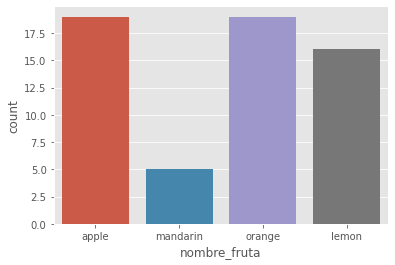

In [ ]:
# grafico de barras para la cantidad de frutas por tipo
sns.countplot(x=df_frutas['nombre_fruta'],label="Número de Frutas")

In [ ]:
df_frutas.head()

etiqueta_fruta nombre_fruta subtipo_fruta  masa_fruta  ancho_fruta  \
0               1        apple  granny_smith       192.0          8.4   
1               1        apple  granny_smith       180.0          8.0   
2               1        apple  granny_smith       176.0          7.4   
3               2     mandarin      mandarin        86.0          6.2   
4               2     mandarin      mandarin        84.0          6.0   

   altura_fruta  puntaje_color  
0           7.3           0.55  
1           6.8           0.59  
2           7.2           0.60  
3           4.7           0.80  
4           4.6           0.79

In [ ]:
# este tipo de clasificación se llama supervisado

feature_names = ['masa_fruta', 'ancho_fruta', 'altura_fruta', 'puntaje_color']
# estamos filtrando la tabla para que tener sólo las columnas que necesito

# estamos obteniendo sólo las features
#              tabla   [] 
features_df = df_frutas[feature_names]


# estamos obteniendo los labels
#            tabla []
label_df = df_frutas['etiqueta_fruta']

In [ ]:
features_df.head()

masa_fruta  ancho_fruta  altura_fruta  puntaje_color
0       192.0          8.4           7.3           0.55
1       180.0          8.0           6.8           0.59
2       176.0          7.4           7.2           0.60
3        86.0          6.2           4.7           0.80
4        84.0          6.0           4.6           0.79

In [ ]:
label_df.head()

0    1
1    1
2    1
3    2
4    2
Name: etiqueta_fruta, dtype: int64

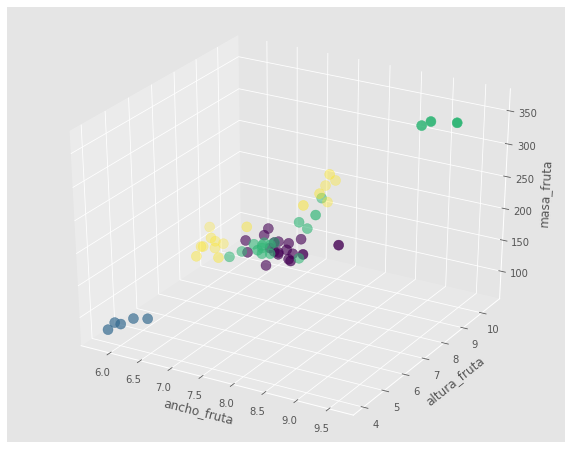

In [ ]:
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(features_df['ancho_fruta'], features_df['altura_fruta'], features_df['masa_fruta'], c = label_df, marker = 'o', s=100)
ax.set_xlabel('ancho_fruta')
ax.set_ylabel('altura_fruta')
ax.set_zlabel('masa_fruta')
plt.show()

In [ ]:
fig = px.scatter_3d(df_frutas, x='ancho_fruta', y='altura_fruta', z='masa_fruta',
                    color='nombre_fruta',
                    title="Características de las frutas")
fig.show()

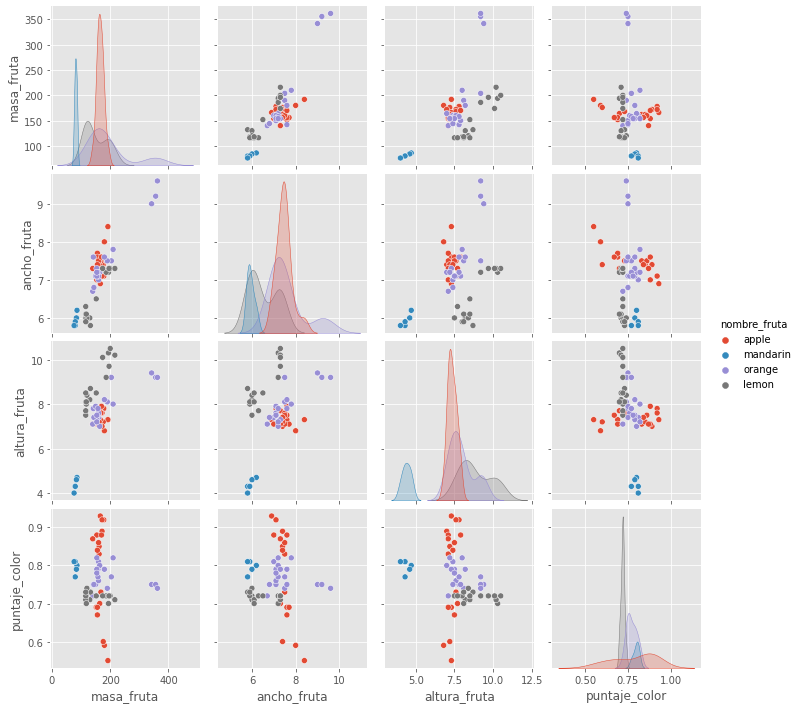

In [ ]:
# columnas que quiero graficar
columna_nombre = 'nombre_fruta'
columnnas_graficar = feature_names + [columna_nombre]
sns.pairplot(df_frutas[columnnas_graficar], hue=columna_nombre)

# Minería de datos
Se nota una fuerte correlación entre la masa y la anchura de las frutas. Más arriba que la relación que la anchura y la altura

In [ ]:
# dataset para entrenar . training
# dataset pruebas.        test

# X para las features
# y para los labels
X_train, X_test, y_train, y_test = train_test_split(features_df, label_df, random_state=0)

### **Escalado**

In [ ]:
# para tener los features bajo la misma escala de valores
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# previsualizando las primeras 3 muestras de features
X_train[:3]

array([[0.27857143, 0.41176471, 0.49230769, 0.72972973],
       [0.35      , 0.44117647, 0.93846154, 0.45945946],
       [0.        , 0.        , 0.        , 0.7027027 ]])

### **Aplicación del kNN**

In [ ]:
# estamos creado la variable modelo 'knn_modelo'
knn_modelo = KNeighborsClassifier()

# para entrenar el modelo
knn_modelo.fit(X_train, y_train)

# evaluando el modelo con los datos de entrenamiento
print(f'Precisión of K-NN clasificador para el dataset de entrenamiento: {knn_modelo.score(X_train, y_train):.2f}')

# evaluando el modelo con los datos de prueba test
print(f'Precisión of K-NN clasificador para el dataset de prueba: {knn_modelo.score(X_test, y_test):.2f}')

Precisión of K-NN clasificador para el dataset de entrenamiento: 0.95
Precisión of K-NN clasificador para el dataset de prueba: 1.00


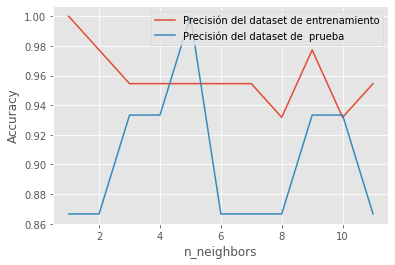

In [ ]:
# para evaluar el rendimiento de la clasificación para diferentes valores de k
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 12)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    modelo = KNeighborsClassifier(n_neighbors=n_neighbors)
    modelo.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(modelo.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(modelo.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label="Precisión del dataset de entrenamiento")
plt.plot(neighbors_settings, test_accuracy, label="Precisión del dataset de  prueba")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

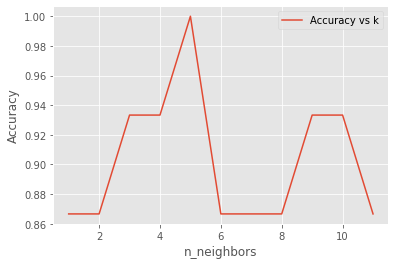

In [ ]:
# para evaluar el rendimiento de la clasificación para diferentes valores de k
test_accuracy = []


neighbors_settings = range(1, 12)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    modelo = KNeighborsClassifier(n_neighbors=n_neighbors)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    test_accuracy.append(accuracy_score(y_test, y_pred))
    

plt.plot(neighbors_settings, test_accuracy, label="Accuracy vs k")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

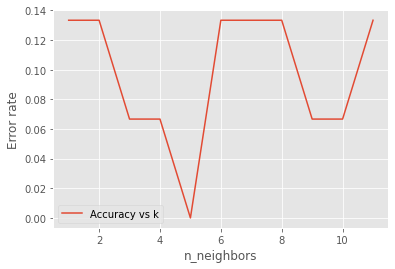

In [ ]:
# para evaluar la relación de error de la clasificación para diferentes valores de k
error_rate = []


neighbors_settings = range(1, 12)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    modelo = KNeighborsClassifier(n_neighbors=n_neighbors)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    error_rate.append(np.mean(y_pred != y_test))
    

plt.plot(neighbors_settings, error_rate, label="Accuracy vs k")

plt.ylabel("Error rate")
plt.xlabel("n_neighbors")
plt.legend()

De momento con k=5 se observe el mejor rendimiento usando un KNN

### **Predecir con nuevos datos**

Se van a crear un nuevo dataset con nuevos valores para nuevas frutas por clasificar

In [ ]:
nuevas_frutas = pd.DataFrame([
    [50,  8, 7, 0.8],
    [200, 7, 6, 0.7],
    [150, 6, 5, 0.5],
],
    columns=['masa_fruta', 'ancho_fruta', 'altura_fruta', 'puntaje_color'])
nuevas_frutas.head()

masa_fruta  ancho_fruta  altura_fruta  puntaje_color
0          50            8             7            0.8
1         200            7             6            0.7
2         150            6             5            0.5

In [ ]:
# para escalado
nuevas_frutas_escaladas = scaler.transform(nuevas_frutas)

In [ ]:
nuevas_frutas_escaladas

array([[-0.09285714,  0.64705882,  0.46153846,  0.67567568],
       [ 0.44285714,  0.35294118,  0.30769231,  0.40540541],
       [ 0.26428571,  0.05882353,  0.15384615, -0.13513514]])

In [ ]:
# para hacer la predicción!
modelo.predict(nuevas_frutas_escaladas)

array([1, 3, 1])

In [ ]:
df_frutas[['etiqueta_fruta', 'nombre_fruta']].drop_duplicates()

etiqueta_fruta nombre_fruta
0                1        apple
3                2     mandarin
24               3       orange
43               4        lemon